In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix , ConfusionMatrixDisplay , confusion_matrix
from sklearn.model_selection import learning_curve
%matplotlib inline

In [26]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [27]:
X=df.iloc[:,:-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [28]:
y=df.iloc[:,-1]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
param_grid =  {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],}
grid = GridSearchCV(svc, param_grid , scoring='accuracy' , verbose = 1) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
print(accuracy_score(y_test, grid_predictions)) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'C': 0.30000000000000004, 'kernel': 'linear'}
0.9794952681388013


In [32]:
param_grid =  {'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf']}
grid = GridSearchCV(svc, param_grid , scoring='accuracy' , verbose = 1)   
grid.fit(X_train, y_train) 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
print(accuracy_score(y_test, grid_predictions)) 

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'C': 0.9, 'gamma': 0.05, 'kernel': 'rbf'}
0.9763406940063092


In [33]:
param_grid =  {'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']}
grid = GridSearchCV(svc, param_grid , scoring='accuracy' , verbose = 1)   
grid.fit(X_train, y_train) 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
print(accuracy_score(y_test, grid_predictions)) 

Fitting 5 folds for each of 135 candidates, totalling 675 fits
{'C': 0.8, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}
0.9621451104100947


In [45]:
K_range=[2,3,4,5,6,7,8,9,10]
acc_score=[]
for c in K_range:
    svc = SVC(kernel='linear', C=0.2)
    scores = cross_val_score(svc, X, y, cv=c, scoring='accuracy')
    acc_score.append(scores.mean())
print(scores.mean())

0.9696931278201493


Text(0, 0.5, 'Cross-Validated Accuracy')

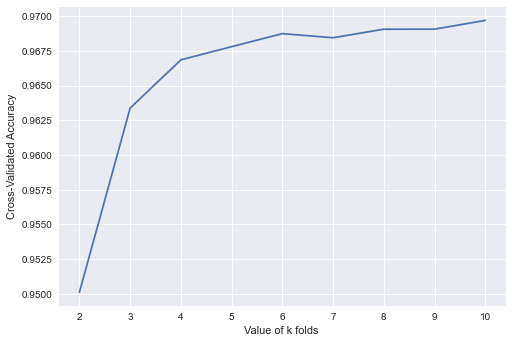

In [46]:
K_range=[2,3,4,5,6,7,8,9,10]
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(K_range,acc_score)
plt.xlabel('Value of k folds ')
plt.ylabel('Cross-Validated Accuracy')

In [47]:
svc = SVC(kernel='linear', C=0.2)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
acc_score.append(scores.mean())
print(scores.mean())

0.9696931278201493


In [48]:
svc=SVC(kernel="linear" , C =0.3 )
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9794952681388013

In [49]:
clf = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=20 , shuffle=False , tol=np.infty)
clf.fit(X_train, y_train)
cross_val_score(clf,X_test,y_test).mean()

0.9606049243844519

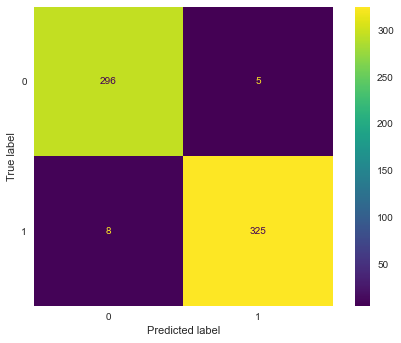

[[296   5]
 [  8 325]]


In [50]:
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)
plt.grid(False)
plt.show()
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

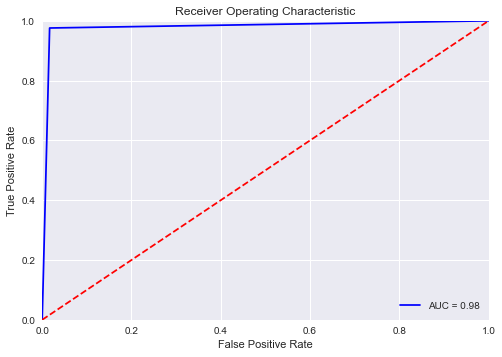

In [51]:
# calculate the fpr and tpr for all thresholds of the classification
probs = svc.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
train_sizes, train_scores, test_scores = learning_curve(svc, 
X, y, cv=10, scoring='accuracy',)

In [53]:
test_scores_mean = test_scores.mean(axis = 1)

In [54]:
train_scores_mean = train_scores.mean(axis = 1)

(0.4, 1.0)

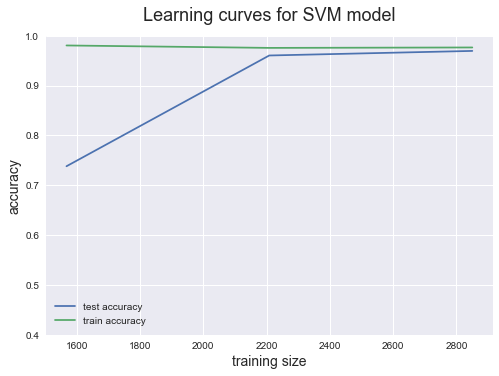

In [55]:
plt.style.use('seaborn')
plt.plot(train_sizes, test_scores_mean, label = 'test accuracy')
plt.plot(train_sizes, train_scores_mean, label = 'train accuracy')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('training size', fontsize = 14)
plt.title('Learning curves for SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.4,1)
